## Load Data

### Subtask:
Load the 'Traffic_Collisions_2023_and_later.csv' file into a pandas DataFrame to begin data processing.


In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import folium
from folium.plugins import HeatMap
import numpy as np

df = pd.read_csv('/content/Traffic_Collisions_2023_and_later.csv')
df.head()

,OBJECTID,EVENT_UNIQUE_ID,OCC_DATE,OCC_MONTH,OCC_DOW,OCC_YEAR,OCC_HOUR,DIVISION,FATALITIES,INJURY_COLLISIONS,...,NEIGHBOURHOOD_158,LONG_WGS84,LAT_WGS84,AUTOMOBILE,MOTORCYCLE,PASSENGER,BICYCLE,PEDESTRIAN,x,y
0,585498,GO-20238109620,1/1/2023 5:00:00 AM,January,Sunday,2023,8,NSA,0,NO,...,NSA,0.000000,0.000000,N/R,N/R,N/R,N/R,N/R,6.330000e-09,5.660000e-09
1,585499,GO-20238050572,1/1/2023 5:00:00 AM,January,Sunday,2023,16,D53,0,NO,...,Lawrence Park South (103),-79.400454,43.716621,YES,NO,NO,NO,NO,-8.838818e+06,5.421693e+06
2,585500,GO-202312297,1/1/2023 5:00:00 AM,January,Sunday,2023,19,D31,0,NO,...,Humber Summit (21),-79.540640,43.771526,YES,NO,NO,NO,NO,-8.854424e+06,5.430153e+06
3,585501,GO-20238050610,1/1/2023 5:00:00 AM,January,Sunday,2023,17,D42,0,NO,...,Tam O'Shanter-Sullivan (118),-79.310953,43.785480,YES,NO,NO,NO,NO,-8.828855e+06,5.432305e+06
4,585502,GO-20238052178,1/1/2023 5:00:00 AM,January,Sunday,2023,15,D22,0,NO,...,Kingsway South (15),-79.498412,43.650052,YES,NO,NO,NO,NO,-8.849723e+06,5.411446e+06


## Define Severe Incident Target

### Subtask:
Create a new binary target variable `is_severe_incident`. This will be `True` (1) if `FATALITIES` is greater than 0 OR if `INJURY_COLLISIONS` is 'YES'. It will be `False` (0) only if both `FATALITIES` are 0 AND `INJURY_COLLISIONS` is 'NO'.


In [82]:
df['is_severe_incident'] = ((df['FATALITIES'] > 0) | (df['INJURY_COLLISIONS'] == 'YES')).astype(int)

# Display the value counts of the newly created 'is_severe_incident' column
print("Value counts for 'is_severe_incident':\n", df['is_severe_incident'].value_counts())

Value counts for 'is_severe_incident':
 is_severe_incident
0    160306
1     26713
Name: count, dtype: int64


## Feature Engineering - Date and Time

### Subtask:
Extract relevant features such as 'month', 'day_of_week', and 'time_of_day' from the 'OCC_DATE' column.


In [83]:
df['OCC_DATE'] = pd.to_datetime(df['OCC_DATE'])
df['month'] = df['OCC_DATE'].dt.month
df['day_of_week'] = df['OCC_DATE'].dt.day_name()
df['time_of_day'] = df['OCC_DATE'].dt.hour

df.head()

,OBJECTID,EVENT_UNIQUE_ID,OCC_DATE,OCC_MONTH,OCC_DOW,OCC_YEAR,OCC_HOUR,DIVISION,FATALITIES,INJURY_COLLISIONS,...,MOTORCYCLE,PASSENGER,BICYCLE,PEDESTRIAN,x,y,is_severe_incident,month,day_of_week,time_of_day
0,585498,GO-20238109620,2023-01-01 05:00:00,January,Sunday,2023,8,NSA,0,NO,...,N/R,N/R,N/R,N/R,6.330000e-09,5.660000e-09,0,1,Sunday,5
1,585499,GO-20238050572,2023-01-01 05:00:00,January,Sunday,2023,16,D53,0,NO,...,NO,NO,NO,NO,-8.838818e+06,5.421693e+06,0,1,Sunday,5
2,585500,GO-202312297,2023-01-01 05:00:00,January,Sunday,2023,19,D31,0,NO,...,NO,NO,NO,NO,-8.854424e+06,5.430153e+06,0,1,Sunday,5
3,585501,GO-20238050610,2023-01-01 05:00:00,January,Sunday,2023,17,D42,0,NO,...,NO,NO,NO,NO,-8.828855e+06,5.432305e+06,0,1,Sunday,5
4,585502,GO-20238052178,2023-01-01 05:00:00,January,Sunday,2023,15,D22,0,NO,...,NO,NO,NO,NO,-8.849723e+06,5.411446e+06,0,1,Sunday,5


## Feature Engineering - Season

### Subtask:
Create a 'season' feature from the extracted month: Winter (Dec-Feb), Spring (Mar-May), Summer (Jun-Aug), Autumn (Sep-Nov).


In [84]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['season'] = df['month'].apply(get_season)

df.head()

,OBJECTID,EVENT_UNIQUE_ID,OCC_DATE,OCC_MONTH,OCC_DOW,OCC_YEAR,OCC_HOUR,DIVISION,FATALITIES,INJURY_COLLISIONS,...,PASSENGER,BICYCLE,PEDESTRIAN,x,y,is_severe_incident,month,day_of_week,time_of_day,season
0,585498,GO-20238109620,2023-01-01 05:00:00,January,Sunday,2023,8,NSA,0,NO,...,N/R,N/R,N/R,6.330000e-09,5.660000e-09,0,1,Sunday,5,Winter
1,585499,GO-20238050572,2023-01-01 05:00:00,January,Sunday,2023,16,D53,0,NO,...,NO,NO,NO,-8.838818e+06,5.421693e+06,0,1,Sunday,5,Winter
2,585500,GO-202312297,2023-01-01 05:00:00,January,Sunday,2023,19,D31,0,NO,...,NO,NO,NO,-8.854424e+06,5.430153e+06,0,1,Sunday,5,Winter
3,585501,GO-20238050610,2023-01-01 05:00:00,January,Sunday,2023,17,D42,0,NO,...,NO,NO,NO,-8.828855e+06,5.432305e+06,0,1,Sunday,5,Winter
4,585502,GO-20238052178,2023-01-01 05:00:00,January,Sunday,2023,15,D22,0,NO,...,NO,NO,NO,-8.849723e+06,5.411446e+06,0,1,Sunday,5,Winter


In [85]:
df = df.rename(columns={'NEIGHBOURHOOD_158': 'Intersection'})
categorical_cols_new = ['Intersection', 'day_of_week', 'time_of_day', 'season']
df_encoded_new = pd.get_dummies(df, columns=categorical_cols_new, drop_first=True)
df_encoded_new.head()

,OBJECTID,EVENT_UNIQUE_ID,OCC_DATE,OCC_MONTH,OCC_DOW,OCC_YEAR,OCC_HOUR,DIVISION,FATALITIES,INJURY_COLLISIONS,...,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,time_of_day_5,season_Spring,season_Summer,season_Winter
0,585498,GO-20238109620,2023-01-01 05:00:00,January,Sunday,2023,8,NSA,0,NO,...,False,False,True,False,False,False,True,False,False,True
1,585499,GO-20238050572,2023-01-01 05:00:00,January,Sunday,2023,16,D53,0,NO,...,False,False,True,False,False,False,True,False,False,True
2,585500,GO-202312297,2023-01-01 05:00:00,January,Sunday,2023,19,D31,0,NO,...,False,False,True,False,False,False,True,False,False,True
3,585501,GO-20238050610,2023-01-01 05:00:00,January,Sunday,2023,17,D42,0,NO,...,False,False,True,False,False,False,True,False,False,True
4,585502,GO-20238052178,2023-01-01 05:00:00,January,Sunday,2023,15,D22,0,NO,...,False,False,True,False,False,False,True,False,False,True


## Split Data for Training and Testing

### Subtask:
Divide the processed dataset with the new set of engineered features (Intersection, day_of_week, time_of_day, season) into training and testing sets, using `is_severe_incident` as the target variable.


**Reasoning**:
To prepare the data for model training, I will define the feature matrix (X_new) using the specified one-hot encoded columns and the target vector (y_new) as 'is_severe_incident'. Then, I will split these into training and testing sets using `train_test_split` with a 80/20 ratio and print their shapes to confirm the split.



In [86]:
feature_columns_new = [col for col in df_encoded_new.columns if
                       col.startswith('Intersection_') or
                       col.startswith('day_of_week_') or
                       col.startswith('time_of_day_') or
                       col.startswith('season_')]

X_new = df_encoded_new[feature_columns_new]
y_new = df_encoded_new['is_severe_incident']

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

print("Shape of X_train_new:", X_train_new.shape)
print("Shape of X_test_new:", X_test_new.shape)
print("Shape of y_train_new:", y_train_new.shape)
print("Shape of y_test_new:", y_test_new.shape)

Shape of X_train_new: (149615, 168)
Shape of X_test_new: (37404, 168)
Shape of y_train_new: (149615,)
Shape of y_test_new: (37404,)


## Train Classification Model

### Subtask:
Train a Logistic Regression model to predict the probability of a 'severe incident', using class_weight='balanced' and an increased max_iter for better convergence with imbalanced data.


In [87]:
model_severe = LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced', max_iter=1000)
model_severe.fit(X_train_new, y_train_new)

print("Logistic Regression model for severe incidents trained successfully.")

Logistic Regression model for severe incidents trained successfully.


New Model Accuracy (Severe): 0.5553
New Model Precision (Severe): 0.1660
New Model Recall (Severe): 0.5289
New Model F1-Score (Severe): 0.2527
ROC AUC Score (Severe): 0.5619


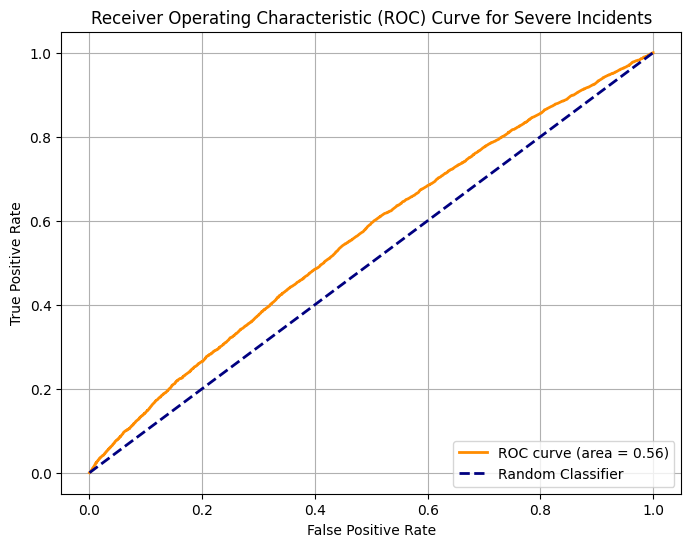

In [88]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred_severe = model_severe.predict(X_test_new)

# Evaluate the model
accuracy_severe = accuracy_score(y_test_new, y_pred_severe)
precision_severe = precision_score(y_test_new, y_pred_severe)
recall_severe = recall_score(y_test_new, y_pred_severe)
f1_severe = f1_score(y_test_new, y_pred_severe)

print(f"New Model Accuracy (Severe): {accuracy_severe:.4f}")
print(f"New Model Precision (Severe): {precision_severe:.4f}")
print(f"New Model Recall (Severe): {recall_severe:.4f}")
print(f"New Model F1-Score (Severe): {f1_severe:.4f}")

# Calculate the probability of the positive class on the test set
y_pred_proba_severe = model_severe.predict_proba(X_test_new)[:, 1]

# Calculate ROC AUC score
roc_auc_severe = roc_auc_score(y_test_new, y_pred_proba_severe)
print(f"ROC AUC Score (Severe): {roc_auc_severe:.4f}")

# Calculate False Positive Rate (FPR) and True Positive Rate (TPR)
fpr_severe, tpr_severe, thresholds_severe = roc_curve(y_test_new, y_pred_proba_severe)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_severe, tpr_severe, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_severe:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Severe Incidents')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [89]:
user_intersection = 'Junction-Wallace Emerson (171)'
user_time = 2
user_day = 'Tuesday'
user_season = 'Winter'

predicted_prob_for_user_input = predict_severe_incident_probability(
    user_intersection, user_time, user_day, user_season, model_severe, feature_columns_new
)

print(f"Predicted probability of a severe incident for:\nIntersection: '{user_intersection}'\nTime: '{user_time}'\nDay: '{user_day}'\nSeason: '{user_season}'\n------------------------------------------------------\nPredicted Probability: {predicted_prob_for_user_input:.4f}")

Predicted probability of a severe incident for:
Intersection: 'Junction-Wallace Emerson (171)'
Time: '2'
Day: 'Tuesday'
Season: 'Winter'
------------------------------------------------------
Predicted Probability: 0.4993


## Generate Severe Incident Probability Table by Intersection

### Subtask:
Create a table showing predicted probabilities of a 'severe incident' for selected 'Intersection' combinations under fixed time, day, and season.


In [90]:
import pandas as pd

# Retrieve all unique Intersection values from feature_columns_new
intersection_cols_new = [col for col in feature_columns_new if col.startswith('Intersection_')]
unique_intersections_from_features = sorted([col.replace('Intersection_', '') for col in intersection_cols_new])

# Define the fixed circumstances for the prediction
# These variables are already defined in the kernel state from previous steps (fixed_time, fixed_day, fixed_season)
# fixed_time = 5  # Example: 5 AM
# fixed_day = 'Monday'
# fixed_season = 'Spring'

# Create a list to store the results
probabilities_by_intersection_severe = []

# Iterate through each unique intersection and predict the probability
# Ensure that the intersection column actually exists in the feature set
for intersection in unique_intersections_from_features:
    prob = predict_severe_incident_probability(
        intersection, fixed_time, fixed_day, fixed_season, model_severe, feature_columns_new
    )
    probabilities_by_intersection_severe.append({
        'Intersection': intersection,
        'Predicted Probability': prob
    })

# Convert the results to a DataFrame for better display
probabilities_df_severe_table = pd.DataFrame(probabilities_by_intersection_severe)

# Sort by probability for easier interpretation
probabilities_df_severe_table = probabilities_df_severe_table.sort_values(by='Predicted Probability', ascending=False).reset_index(drop=True)

print(f"Predicted severe incident probabilities for fixed Time={fixed_time}, Day={fixed_day}, Season={fixed_season}:\n")
print(f"Displaying all {len(probabilities_df_severe_table)} unique intersections.\n")
display(probabilities_df_severe_table)

Predicted severe incident probabilities for fixed Time=5, Day=Monday, Season=Spring:

Displaying all 158 unique intersections.



,Intersection,Predicted Probability
0,Humber Heights-Westmount (8),0.583784
1,Markland Wood (12),0.560928
2,Etobicoke West Mall (13),0.546003
3,Rustic (28),0.541720
4,Thistletown-Beaumond Heights (3),0.538877
...,...,...
153,Yonge-Eglinton (100),0.344815
154,Yonge-St.Clair (97),0.339067
155,The Beaches (63),0.315471
156,Humewood-Cedarvale (106),0.312433


In [91]:
import pickle
with open("model.pkl", "wb") as f:
    pickle.dump(model_severe, f)